In [235]:
import os
import requests
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [86]:
# URL of the file to download
url = "https://www.kaggle.com/datasets/shalfey/extended-crab-age-prediction/download?datasetVersionNumber=1"

In [87]:
# File path to save the downloaded file
file_path = "Crabs.csv"

In [88]:
def download_file(url, file_path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print("File downloaded successfully.")
    else:
        print("Failed to download file.")

In [89]:
def check_and_download_file(url, file_path):
    if not os.path.isfile(file_path):
        download_file(url, file_path)
    else:
        print("File already exists.")

In [90]:
# Check if the file exists and download it if necessary
check_and_download_file(url, file_path)

File already exists.


In [91]:
df = pd.read_csv(file_path)

# Remove rows with "0" value
later in the EDA when we run the descriptive stats, we see that the min of many variables is 0.  This needs to be cleaned.

In [92]:
df.replace(0, float('nan'), inplace=True)
df.dropna(inplace=True)

# New Variables

Because many of the variables will be colinear, I want to produce two calculated variables called Volume and Density


In [93]:
# Volume
df['Volume'] = np.pi * (df['Diameter'] / 2)**2 * df['Height']

In [94]:
 # Density
df['Density'] = df['Weight'] / df['Volume']

In [95]:
print(df.shape)

(199852, 12)


In [96]:
# Get the count of NA values in each column
na_counts = df.isna().sum()
null_counts = df.isnull().sum()
print("NA counts:")
print(na_counts)
print("Null counts:")
print(null_counts)



NA counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Volume            0
Density           0
dtype: int64
Null counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Volume            0
Density           0
dtype: int64


In [97]:
# info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199852 entries, 1 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              199852 non-null  float64
 1   Sex             199852 non-null  object 
 2   Length          199852 non-null  float64
 3   Diameter        199852 non-null  float64
 4   Height          199852 non-null  float64
 5   Weight          199852 non-null  float64
 6   Shucked Weight  199852 non-null  float64
 7   Viscera Weight  199852 non-null  float64
 8   Shell Weight    199852 non-null  float64
 9   Age             199852 non-null  float64
 10  Volume          199852 non-null  float64
 11  Density         199852 non-null  float64
dtypes: float64(11), object(1)
memory usage: 19.8+ MB
None


In [98]:
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
1  1.0   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2  2.0   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3  3.0   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4  4.0   I  1.1375    0.8750  0.2875  14.968536        5.953395   
5  5.0   F  1.4875    1.1875  0.4000  28.335325       12.048538   

   Viscera Weight  Shell Weight   Age    Volume    Density  
1        3.798833      7.654365  19.0  0.294524  74.309024  
2        7.016501      7.257472  11.0  0.437824  64.524248  
3        4.110678      6.378637   9.0  0.309435  69.766419  
4        2.962523      3.713785   8.0  0.172880  86.583570  
5        7.668540      8.504850  10.0  0.443014  63.960388

In [99]:
# Descriptive statistics
print(df.describe())

                  id         Length       Diameter         Height  \
count  199852.000000  199852.000000  199852.000000  199852.000000   
mean    99996.314633       1.313000       1.020788       0.346273   
std     57734.152658       0.289181       0.238135       0.090756   
min         1.000000       0.187500       0.112500       0.012500   
25%     49996.750000       1.150000       0.875000       0.287500   
50%     99999.500000       1.375000       1.075000       0.362500   
75%    149994.250000       1.525000       1.200000       0.412500   
max    199999.000000       7.583491       2.250000       2.825000   

              Weight  Shucked Weight  Viscera Weight   Shell Weight  \
count  199852.000000   199852.000000   199852.000000  199852.000000   
mean       23.138912        9.996106        4.996516       6.638642   
std        12.589390        5.600855        2.783996       3.554264   
min         0.028349        0.014175        0.014175       0.042524   
25%        13.168343   

In [133]:
# some variables for future use

variables = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Volume', 'Density']
ages = np.sort(df['Age'].unique())


# Remove outliers

In [159]:
threshold = 3

z_scores = (df['Density'] - df['Density'].mean()) / df['Density'].std()
        
# Identify the outliers using the threshold
outliers = df[abs(z_scores) > threshold]
        
# Remove the outliers from the DataFrame
df = df.drop(outliers.index)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)


In [160]:
# Group the dataset by sex and age
grouped = df.groupby(['Sex', 'Age'])

grouped.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0            1.0   I  1.2375    1.0000  0.3750  21.885814        7.654365   
1            2.0   F  1.4500    1.1625  0.4125  28.250277       11.127179   
2            3.0   I  1.3500    1.0250  0.3750  21.588144        9.738053   
3            4.0   I  1.1375    0.8750  0.2875  14.968536        5.953395   
4            5.0   F  1.4875    1.1875  0.4000  28.335325       12.048538   
...          ...  ..     ...       ...     ...        ...             ...   
100216  105301.0   I  1.3375    1.0500  0.4000  21.829115        9.270286   
103576  108831.0   I  1.4750    1.1500  0.4125  27.782510       10.772810   
105569  110925.0   I  1.5750    1.1875  0.4500  31.609693       10.290869   
172866  181596.0   M  0.7375    0.5500  0.1750   3.813008        1.247378   
173773  182550.0   I  1.4500    1.1000  0.5125  33.480759       11.793392   

        Viscera Weight  Shell Weight   Age    Volume    Density  
0             3.798833      7.654365  19.0  0.294524  74.309024  
1             7.016501      7.257472  11.0  0.437824  64.524248  
2             4.110678      6.378637   9.0  0.309435  69.766419  
3             2.962523      3.713785   8.0  0.172880  86.583570  
4             7.668540      8.504850  10.0  0.443014  63.960388  
...                ...           ...   ...       ...        ...  
100216        4.195726      7.370870  26.0  0.346361  63.024246  
103576        6.251065      8.334753  29.0  0.428459  64.842831  
105569        7.271647     10.064072  22.0  0.498390  63.423563  
172866        1.077281      0.992232   2.0  0.041577  91.709511  
173773        6.988152      9.355335  27.0  0.487045  68.742636  

[378 rows x 12 columns]

In [161]:
for age in ages:
    print(f"\nAge: {age}")
    print("-------------------------")
    group = df[df['Age'] == age]
    for var in variables:
        group1 = group[group['Sex'] == 'M'][var]
        group2 = group[group['Sex'] == 'F'][var]
        # Check for missing values
        if group1.isnull().any() or group2.isnull().any():
            print(f"For Age={age}, Variable={var}: Missing values present")
            continue  # Skip the t-test if there are missing values

        # Check if there are sufficient data points in each group
        if len(group1) < 2 or len(group2) < 2:
            print(f"For Age={age}, Variable={var}: Insufficient data")
            continue  # Skip the t-test if there are fewer than two data points in any group

        # Perform t-test
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"Age={age}, Variable={var}: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")

        if p_value < 0.05:
            print("Reject null")



Age: 4
-------------------------
For Age=4, Variable=Length: Insufficient data
For Age=4, Variable=Diameter: Insufficient data
For Age=4, Variable=Height: Insufficient data
For Age=4, Variable=Weight: Insufficient data
For Age=4, Variable=Shucked Weight: Insufficient data
For Age=4, Variable=Viscera Weight: Insufficient data
For Age=4, Variable=Shell Weight: Insufficient data
For Age=4, Variable=Volume: Insufficient data
For Age=4, Variable=Density: Insufficient data

Age: 5
-------------------------
Age=5, Variable=Length: t-statistic=-1.926, p-value=0.055
Age=5, Variable=Diameter: t-statistic=-1.656, p-value=0.099
Age=5, Variable=Height: t-statistic=-1.496, p-value=0.136
Age=5, Variable=Weight: t-statistic=-1.957, p-value=0.052
Age=5, Variable=Shucked Weight: t-statistic=-0.912, p-value=0.363
Age=5, Variable=Viscera Weight: t-statistic=-2.100, p-value=0.037
Reject null
Age=5, Variable=Shell Weight: t-statistic=-2.747, p-value=0.007
Reject null
Age=5, Variable=Volume: t-statistic=-1.

# Notes on t tests

* It appears that crabs aged 5-11 have sigificant size differences between sexes.  

* There appears to be no difference past 20 years old.

* When they are first hatched *and* when they get older, the diffrence becomes scientifically insignificant.


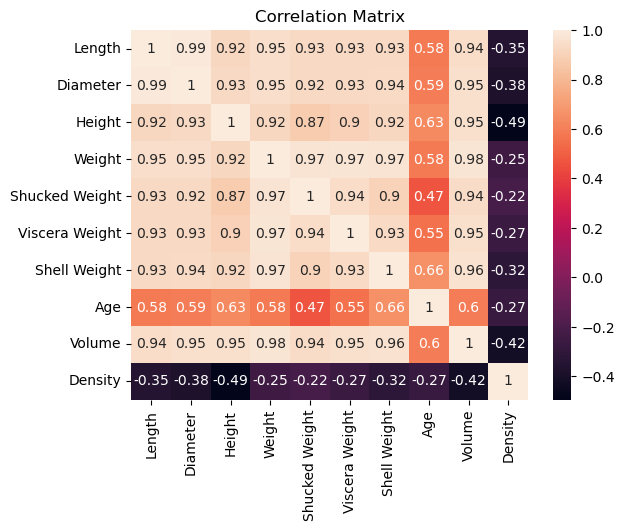

In [162]:
df_1 = df.drop('id', axis=1)

correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [169]:
df_filtered = df_1[(~df['Sex'].isin(['I']))]
#print(df_filtered.describe())

In [170]:
ages = list(range(4,28))

# Calculate the sample size for each age group and sex
sample_size_per_age_sex = sample_size // (len(ages) * 2)

df_sample = pd.DataFrame()

# Loop through each age group
for age in ages:
    # Loop through each sex
    for sex in ("M","F"):
        # Take a sample of size `sample_size_per_age_sex` for each age group and sex
        age_sex_group_sample = df_filtered[(df_filtered['Age'] == age) & (df_filtered['Sex'] == sex)].sample(n=sample_size_per_age_sex, replace=True)
        
        # Append the age and sex group sample to the main sample DataFrame
        df_sample = pd.concat([df_sample, age_sex_group_sample])

# Reset the index of the sample DataFrame
df_sample = df_sample.reset_index(drop=True)



In [242]:
df_age_5_11 = df_sample[df_sample['Age'].between(5, 11)]
print(df_age_5_11.describe())
df_age_gt_18 = df_sample[df_sample['Age'] > 18]
print(df_age_gt_18.describe())

            Length     Diameter       Height       Weight  Shucked Weight  \
count  2912.000000  2912.000000  2912.000000  2912.000000     2912.000000   
mean      1.232997     0.953868     0.319491    19.582519        8.760873   
std       0.303778     0.250585     0.090387    12.165899        5.638634   
min       0.537500     0.400000     0.125000     1.318252        0.467767   
25%       0.962500     0.725000     0.246875     7.930773        3.391309   
50%       1.287500     1.000000     0.325000    18.760282        8.462326   
75%       1.475000     1.162500     0.387500    28.831442       13.044314   
max       1.912500     1.462500     0.575000    55.433760       25.401152   

       Viscera Weight  Shell Weight          Age       Volume      Density  
count     2912.000000   2912.000000  2912.000000  2912.000000  2912.000000  
mean         4.260094      5.468221     8.000000     0.274880    74.072139  
std          2.686738      3.269868     2.000343     0.179772     8.806274 

In [172]:

# Perform t-test for each variable in df_age_gt_11
print("Age > 18")
print("-------------------------")
for var in variables:
    group1 = df_age_gt_19[df_age_gt_19['Sex'] == 'M'][var]
    group2 = df_age_gt_19[df_age_gt_19['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")

# Perform t-test for each variable in df_age_5_11
print("\nAge 5-11")
print("-------------------------")
for var in variables:
    group1 = df_age_5_11[df_age_5_11['Sex'] == 'M'][var]
    group2 = df_age_5_11[df_age_5_11['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")


Age > 19
-------------------------
Variable: Length
For Males and Females: t-statistic=-5.216, p-value=0.000
Reject null
-------------------------
Variable: Diameter
For Males and Females: t-statistic=-5.558, p-value=0.000
Reject null
-------------------------
Variable: Height
For Males and Females: t-statistic=-3.067, p-value=0.002
Reject null
-------------------------
Variable: Weight
For Males and Females: t-statistic=-5.421, p-value=0.000
Reject null
-------------------------
Variable: Shucked Weight
For Males and Females: t-statistic=-4.687, p-value=0.000
Reject null
-------------------------
Variable: Viscera Weight
For Males and Females: t-statistic=-7.039, p-value=0.000
Reject null
-------------------------
Variable: Shell Weight
For Males and Females: t-statistic=-4.476, p-value=0.000
Reject null
-------------------------
Variable: Volume
For Males and Females: t-statistic=-4.938, p-value=0.000
Reject null
-------------------------
Variable: Density
For Males and Females: t-st

# Notes on t testing subsets

* I tested my two subsets expecting one to be significant an the other not to.  They are both significant.  I assume this is because of un-equal samples across ages.  this would nullify significance testing if age is not controlled for.

* Re-did the analysis with after normalizing the sample across ages and found that density and shucked weight are the most similar in old the old crab group.

## Sampling Methodology:
Because we know that there is differences in sizes in some ages, when we anlayze, we want to be sure we are not over-representing an age in our data.

### 3 datasets
* Master dataset with 10,000 records split between age groups.
* 5-11 years. Equal representation of amoung included age groups.
* 18+ years.  Equal representation of amoung included age groups.


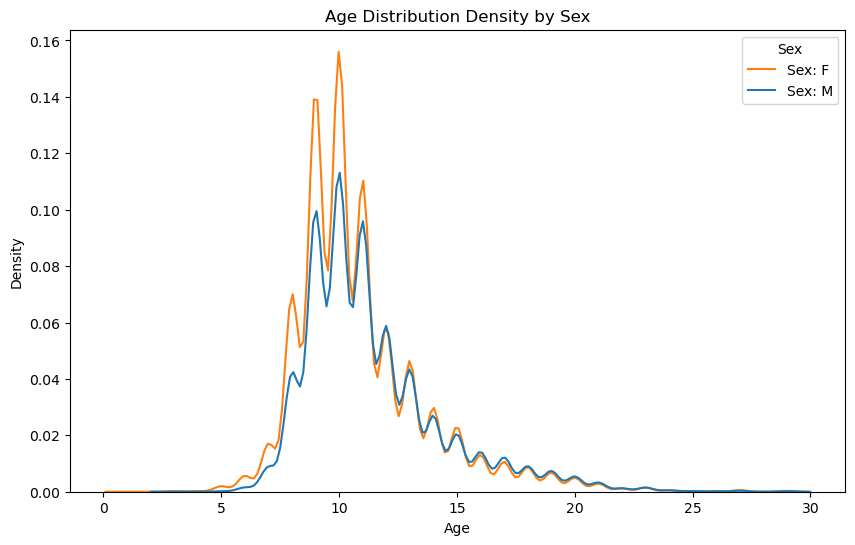

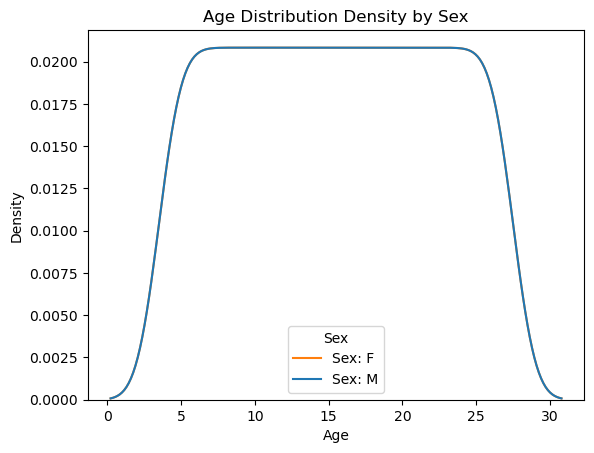

In [189]:

plt.figure(figsize=(10, 6))

for d in [df_filtered, df_sample]:
    # Plot the KDE plot colored by sex
    sns.kdeplot(data=d , x='Age', hue='Sex')

    # Set the title and labels
    plt.title('Age Distribution Density by Sex')
    plt.xlabel('Age')
    plt.ylabel('Density')

    # Get the unique sex categories
    sex_categories = df_filtered['Sex'].unique()

    # Create the legend with the sex categories
    legend_labels = [f'Sex: {sex}' for sex in sex_categories]
    plt.legend(legend_labels, title='Sex')

    # Display the plot
    plt.show()



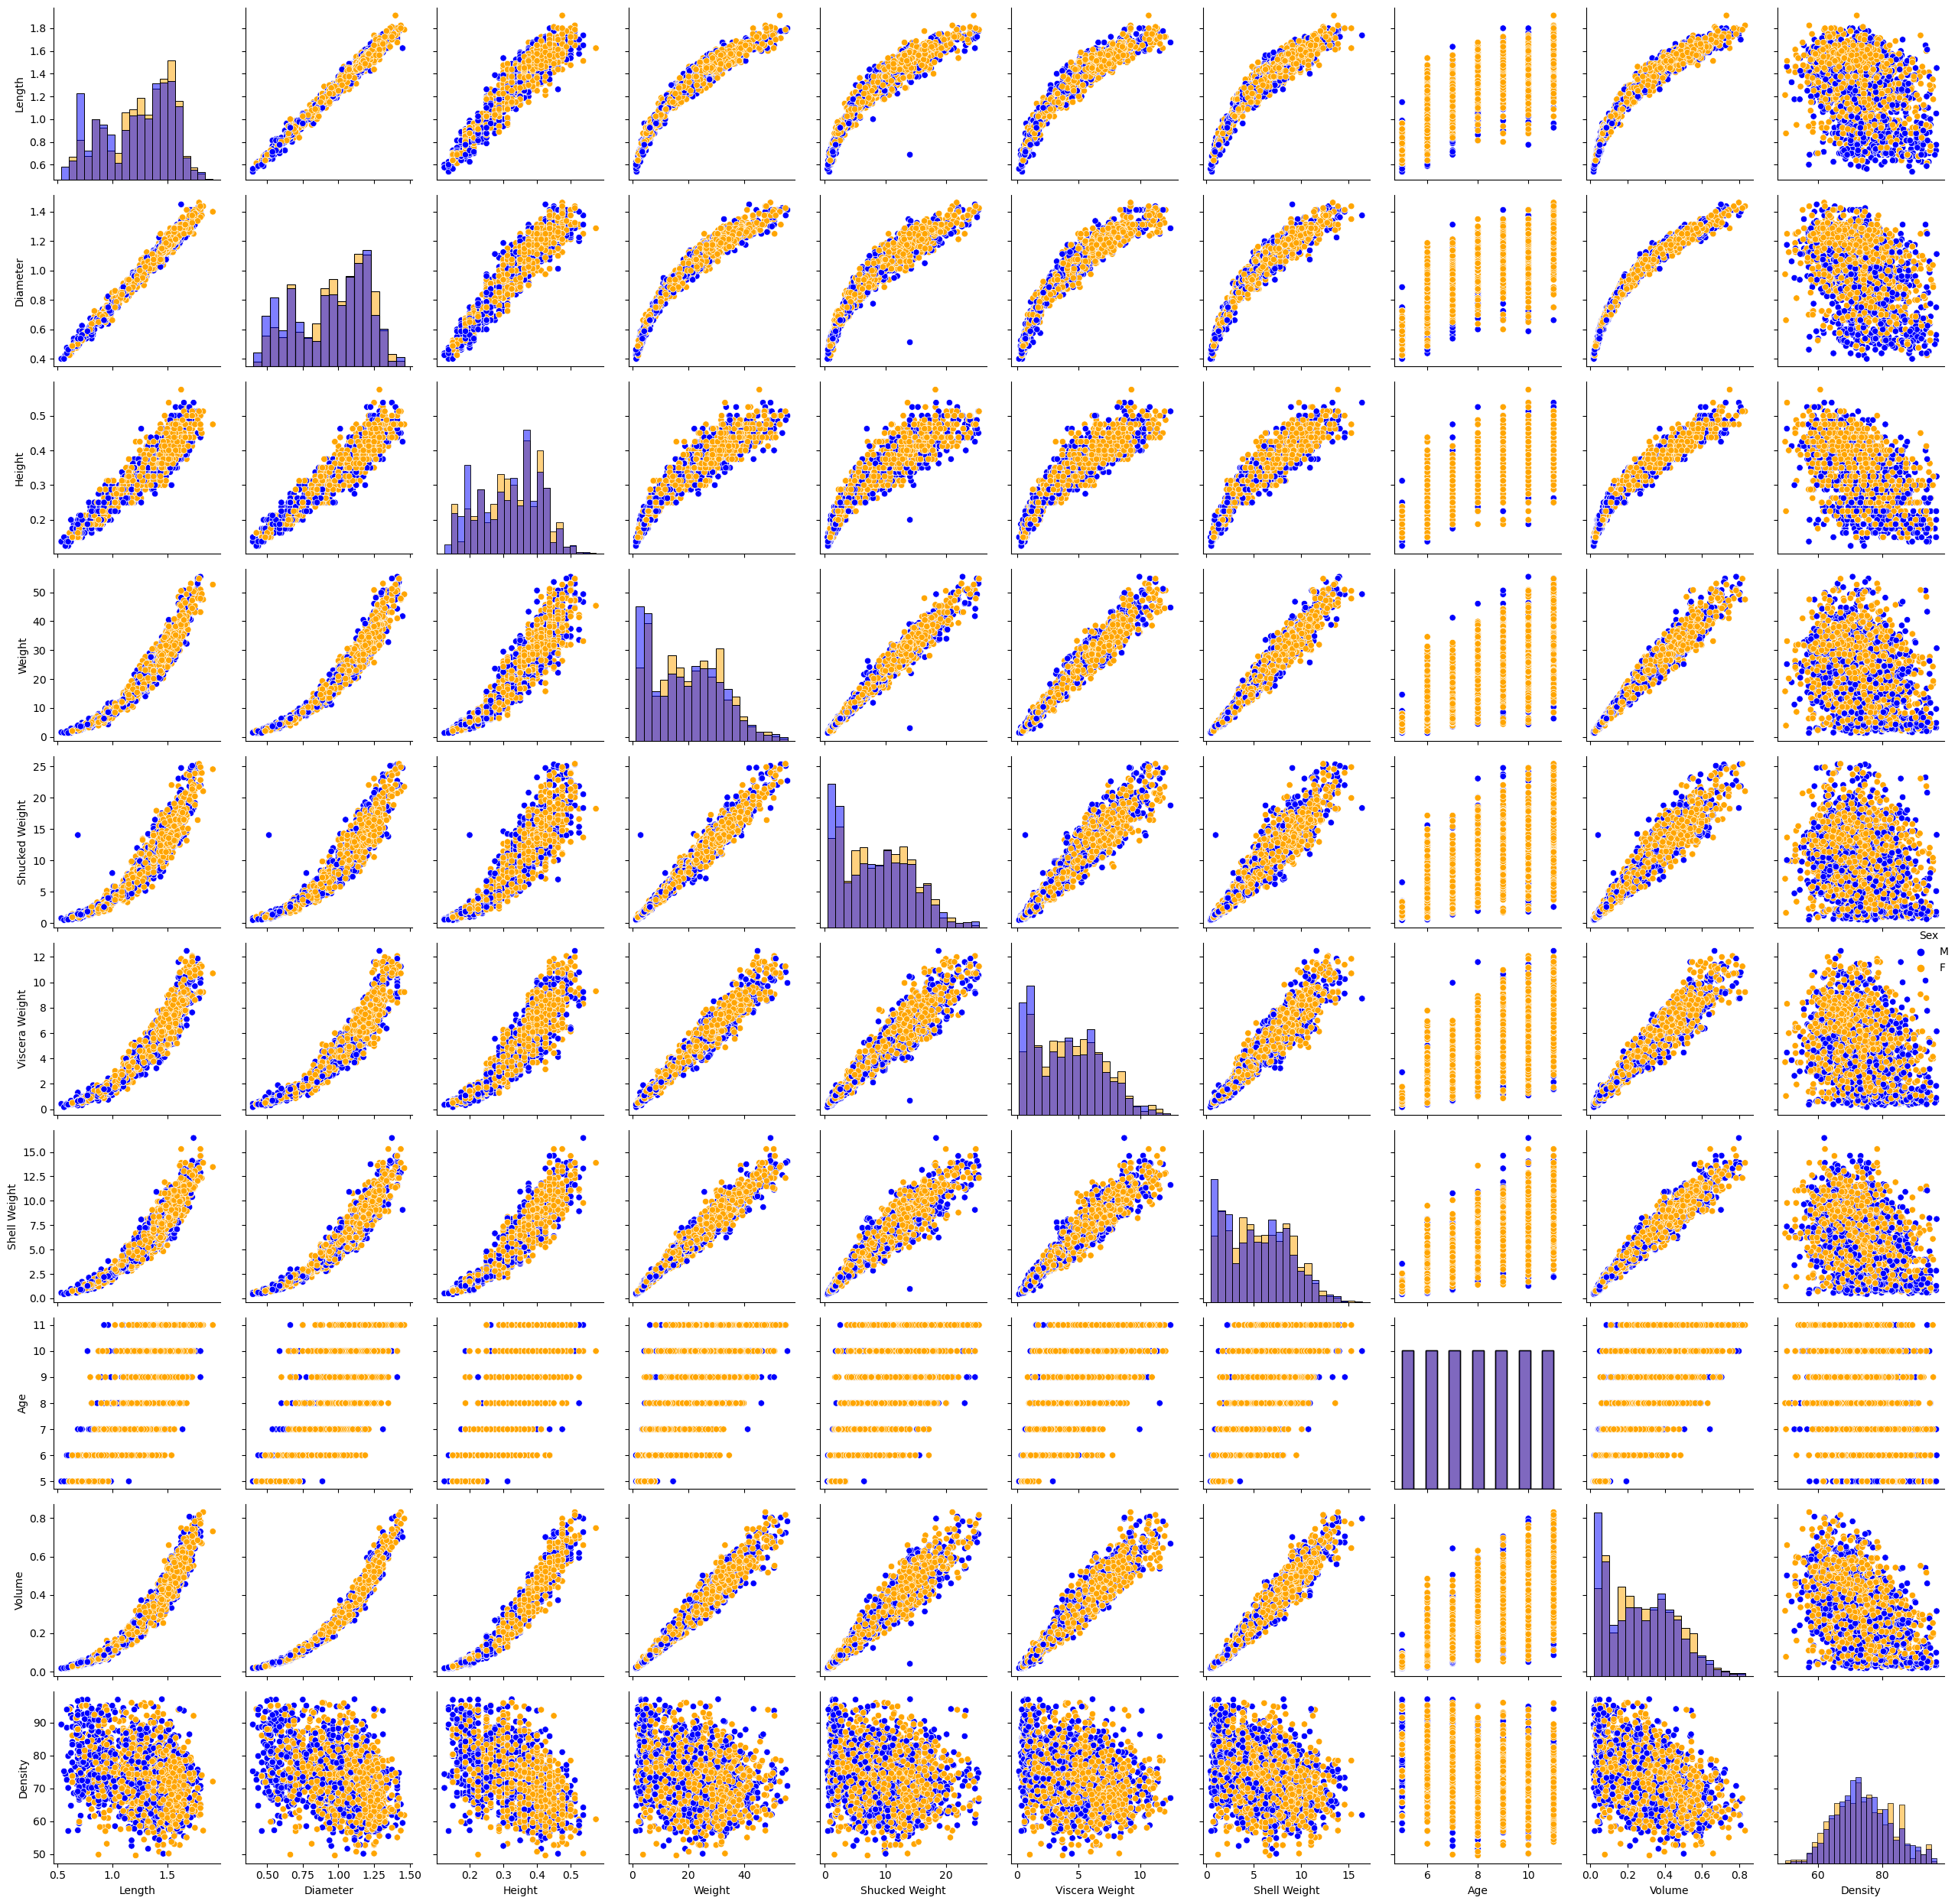

In [200]:
# Create PairGrid plot for dataset_5_11
g1 = sns.PairGrid(df_age_5_11, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g1.map_upper(sns.scatterplot)
g1.map_lower(sns.scatterplot)
#g1.map_lower(sns.kdeplot)
g1.map_diag(sns.histplot)
g1.add_legend(title='Sex')

plt.tight_layout()
plt.show()



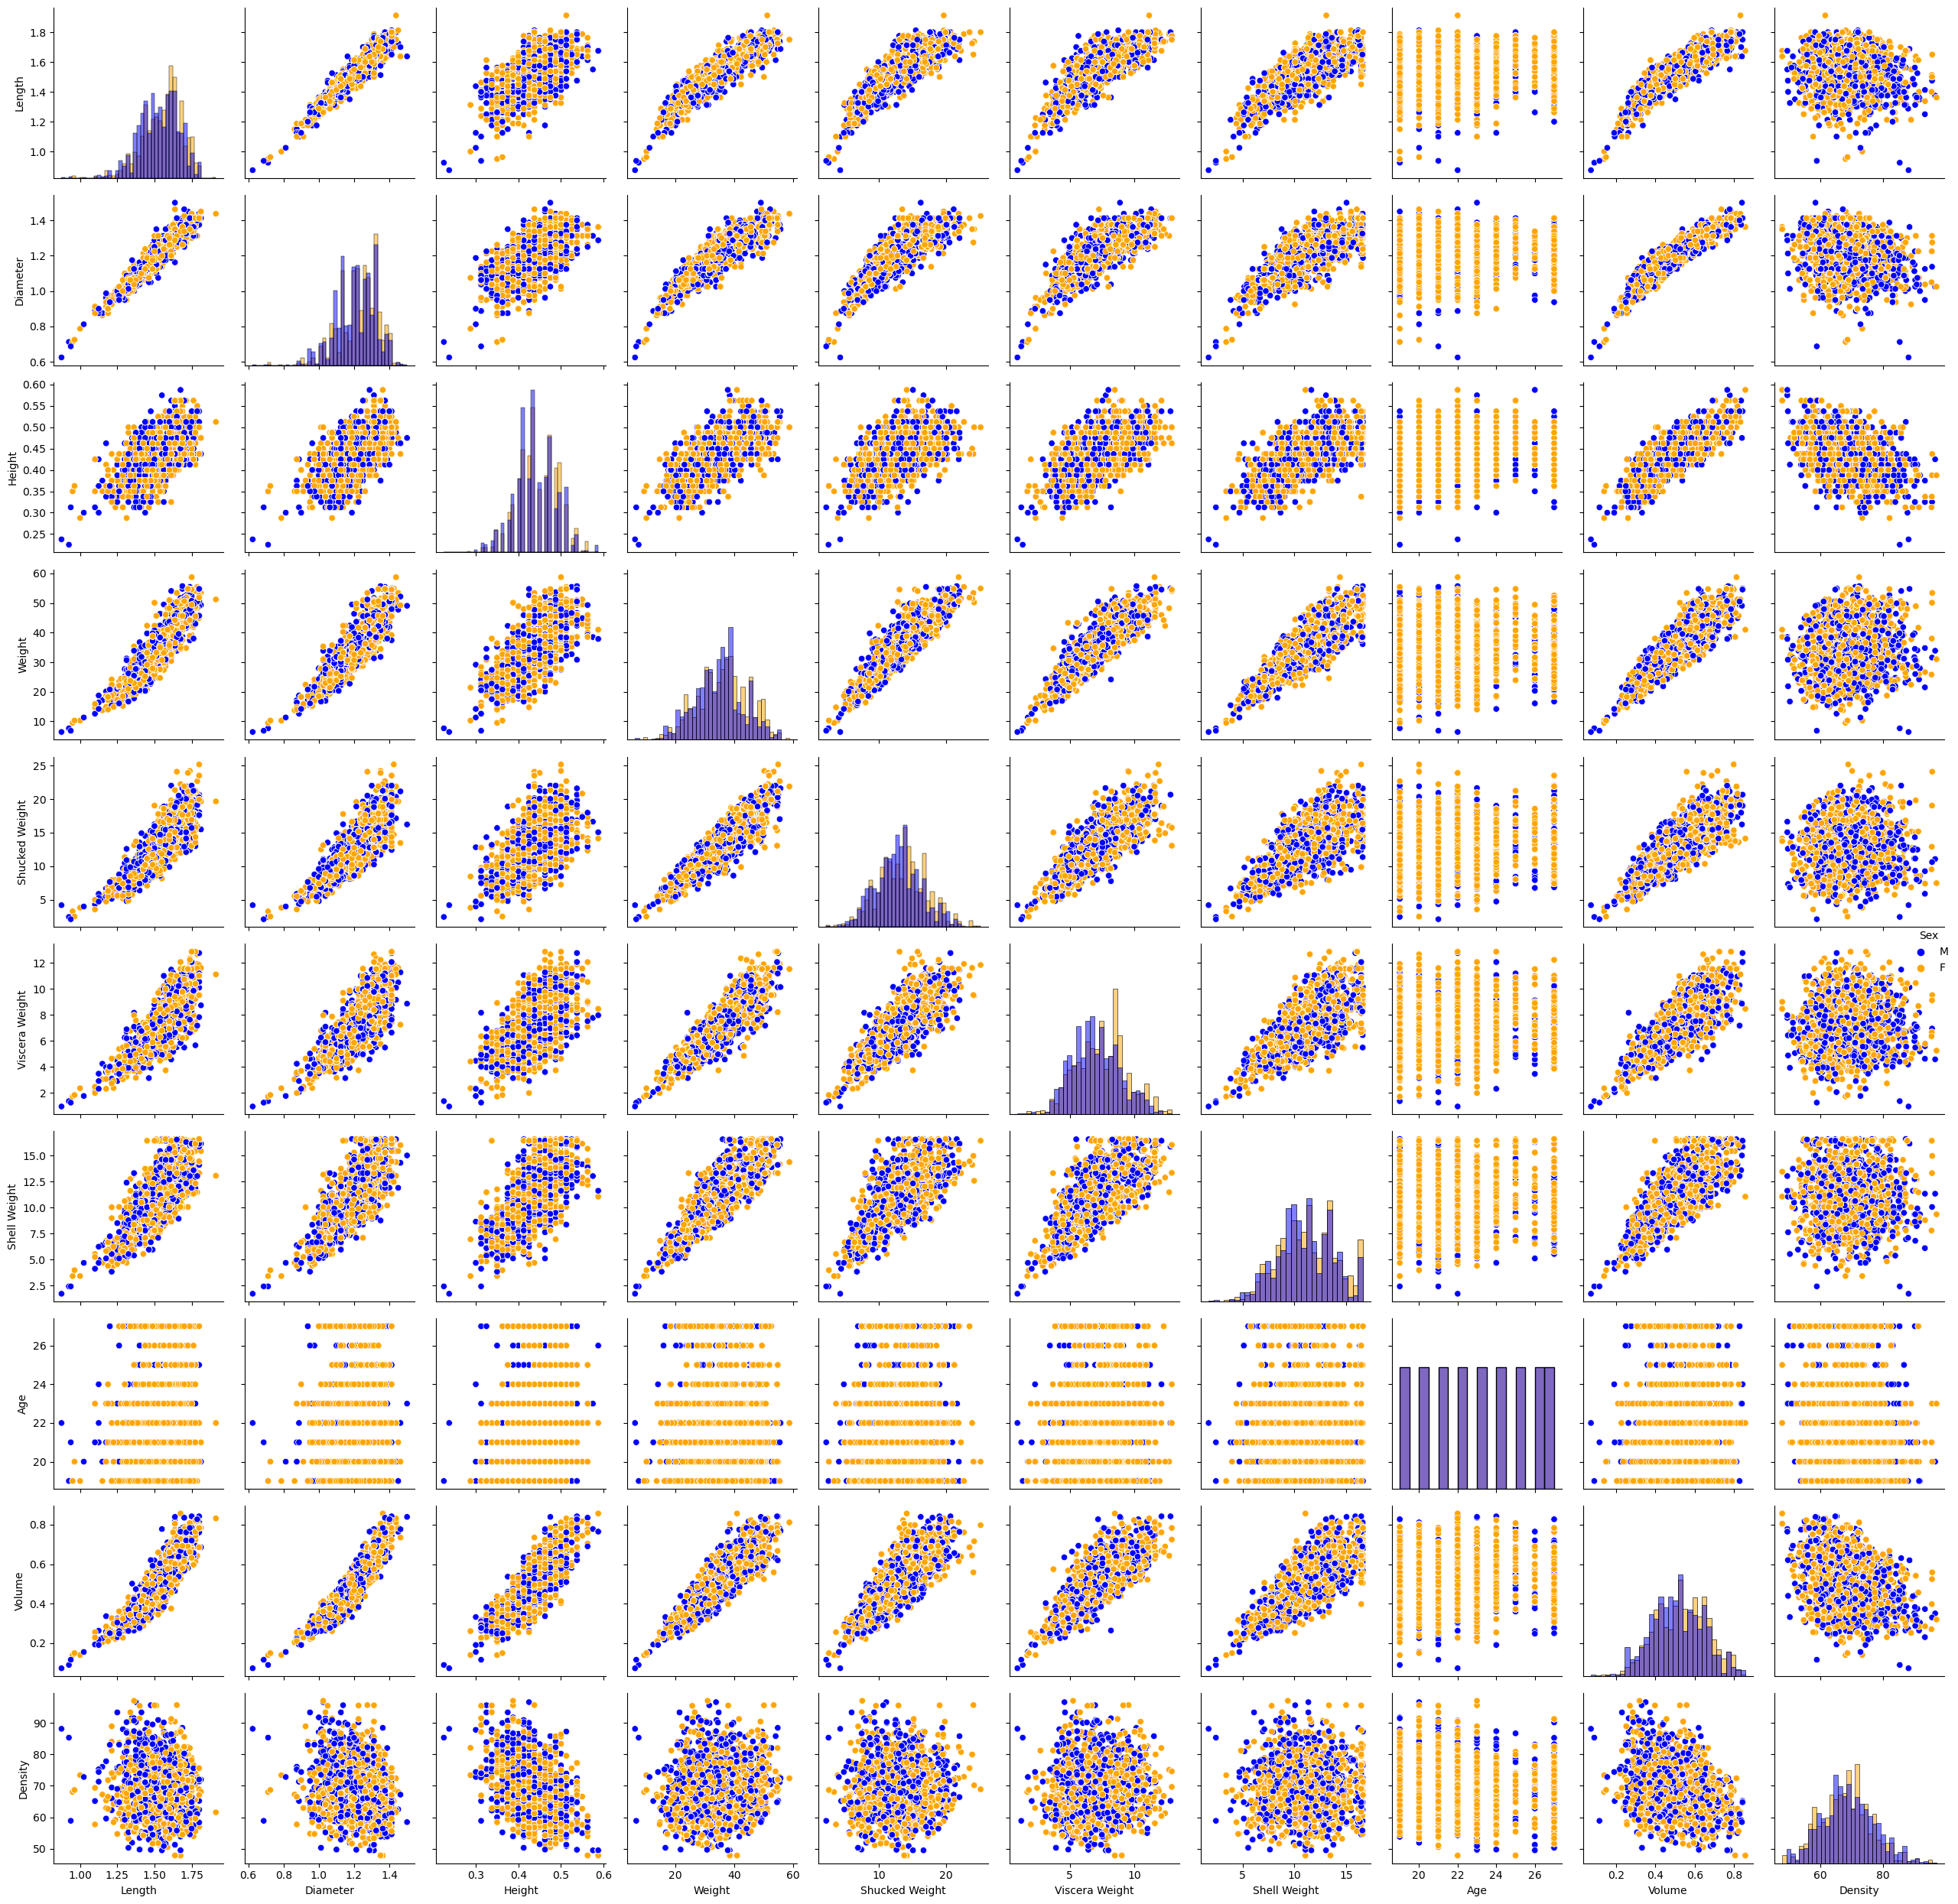

In [199]:
g2 = sns.PairGrid(df_age_gt_18, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g2.map_upper(sns.scatterplot)
g2.map_lower(sns.scatterplot)
#g2.map_lower(sns.kdeplot)
g2.map_diag(sns.histplot)
g2.add_legend(title='Sex')

plt.tight_layout()
plt.show()


# Notes on Pair Plot

* The differences between sexes is not apparent visually here in the scatter plot.
* There when smoothed with Kernal Density Function, we pull visually separate the data a bit further and see that the males in the 5-11 dataset have a long tail on the the small side indicating that perhaps the females have a growth spurt before the males but it equals out by the time both are aged to full size.
* There are some interesting asymtote, liniar and curved relationships.  There appear to be finite sizes the crabs can reach.

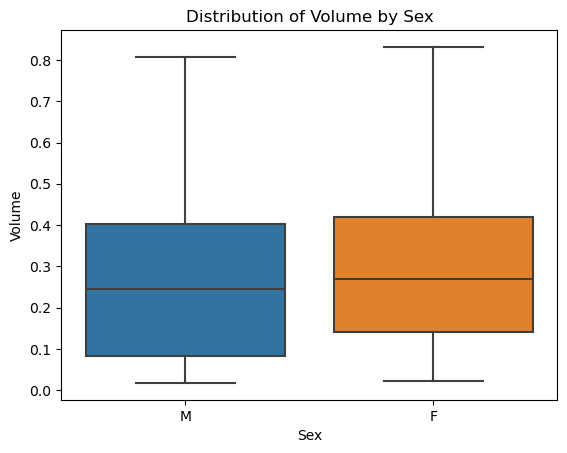

In [175]:


# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_5_11)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()


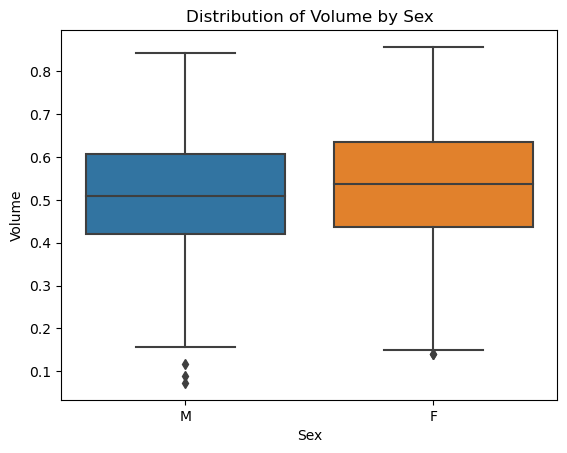

In [176]:
# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_gt_18)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()

# notes on additional plots

Hard to spot differences in the sexes.  Will need to explore by age in order to really dig into it.

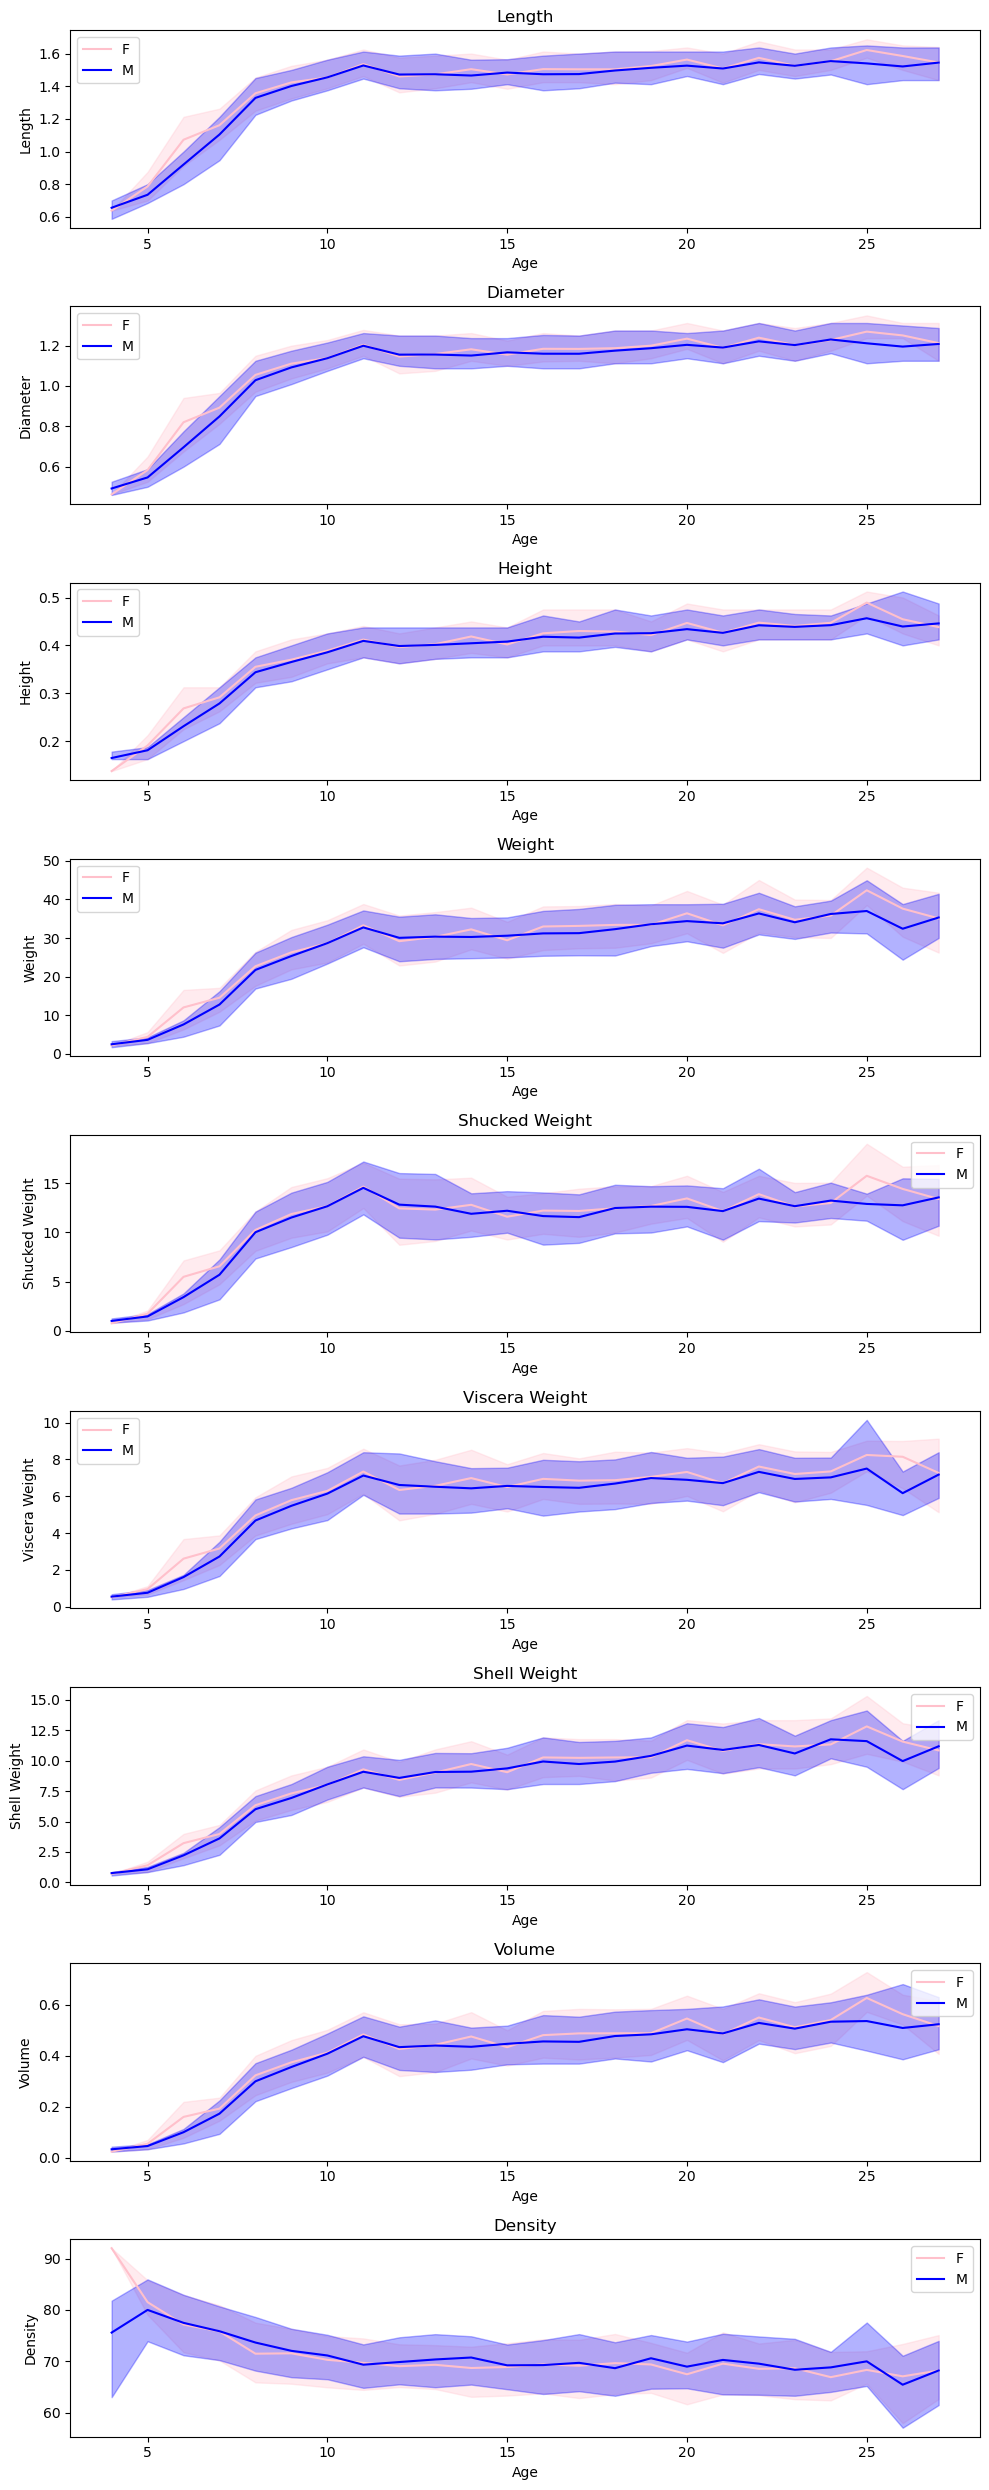

In [183]:
grouped_data = df_sample.groupby('Sex')

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 25))
plt.subplots_adjust(hspace=0.7)

# Variable Iteration Loop
for i, variable in enumerate(variables):
    # Initialize colors for males and females
    colors = ['pink', 'blue']
    
    # One line per sex
    for j, (sex, group) in enumerate(grouped_data):
        # Calculate the mean and confidence interval
        mean = group.groupby('Age')[variable].mean()
        lower_ci = group.groupby('Age')[variable].quantile(0.25)
        upper_ci = group.groupby('Age')[variable].quantile(0.75)
        
        # mean
        axes[i].plot(mean.index, mean, label=sex, color=colors[j])
        
        # Confidence interval
        axes[i].fill_between(mean.index, lower_ci, upper_ci, alpha=0.3, color=colors[j])
        
    # Set the title and labels for each variable subplot
    axes[i].set_title(variable)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(variable)
    
    # Add legend
    axes[i].legend()

# Adjust the figure layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2938.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:50:51   Log-Likelihood:                -4930.1
No. Observations:                1456   AIC:                             9864.
Df Residuals:                    1454   BIC:                             9875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7436      

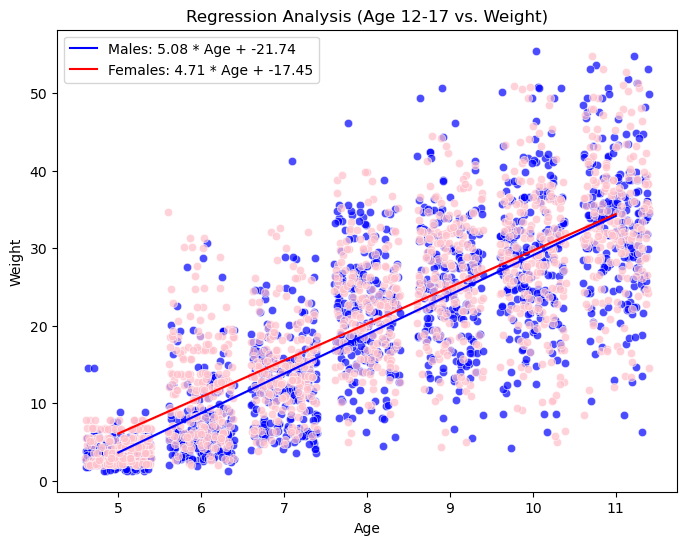

In [238]:
males = df_age_5_11[df_age_5_11['Sex'] == 'M'].copy()
females = df_age_5_11[df_age_5_11['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))

# Regression analysis for males
X_males = males[['Age']]
y_males = males['Weight']

X_males = sm.add_constant(X_males)

model_males = sm.OLS(y_males, X_males).fit()  

# Regression analysis for females
X_females = females[['Age']]
y_females = females['Weight']

X_females = sm.add_constant(X_females) 

model_females = sm.OLS(y_females, X_females).fit()

# Model summaries
print("Male Regression Summary:")
print(model_males.summary())

print("\nFemale Regression Summary:")
print(model_females.summary())

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7)

# Regression lines and formulas for males and females
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')

plt.title('Regression Analysis (Age 12-17 vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()

plt.show()



In [208]:
df_age_12_18 = df_sample[(df_sample['Age'] >= 12) & (df_sample['Age'] <= 18)]

Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.363
Date:                Mon, 26 Jun 2023   Prob (F-statistic):            0.00389
Time:                        15:48:01   Log-Likelihood:                -5255.7
No. Observations:                1456   AIC:                         1.052e+04
Df Residuals:                    1454   BIC:                         1.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7784      

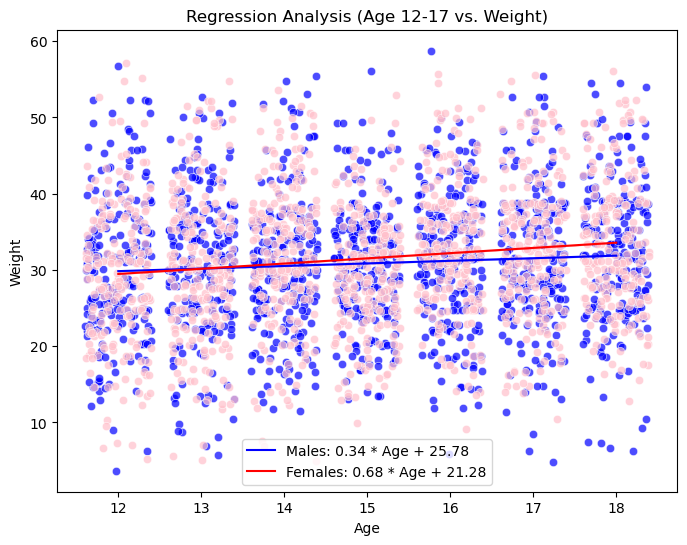

In [237]:
males = df_age_12_18[df_age_12_18['Sex'] == 'M'].copy()
females = df_age_12_18[df_age_12_18['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))

# Regression analysis for males
X_males = males[['Age']]
y_males = males['Weight']

X_males = sm.add_constant(X_males)

model_males = sm.OLS(y_males, X_males).fit()  

# Regression analysis for females
X_females = females[['Age']]
y_females = females['Weight']

X_females = sm.add_constant(X_females) 

model_females = sm.OLS(y_females, X_females).fit()

# Model summaries
print("Male Regression Summary:")
print(model_males.summary())

print("\nFemale Regression Summary:")
print(model_females.summary())

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7)

# Regression lines and formulas for males and females
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')

plt.title('Regression Analysis (Age 12-18 vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()

plt.show()



Male Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3154
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.574
Time:                        15:52:16   Log-Likelihood:                -5840.5
No. Observations:                1664   AIC:                         1.169e+04
Df Residuals:                    1662   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5665      

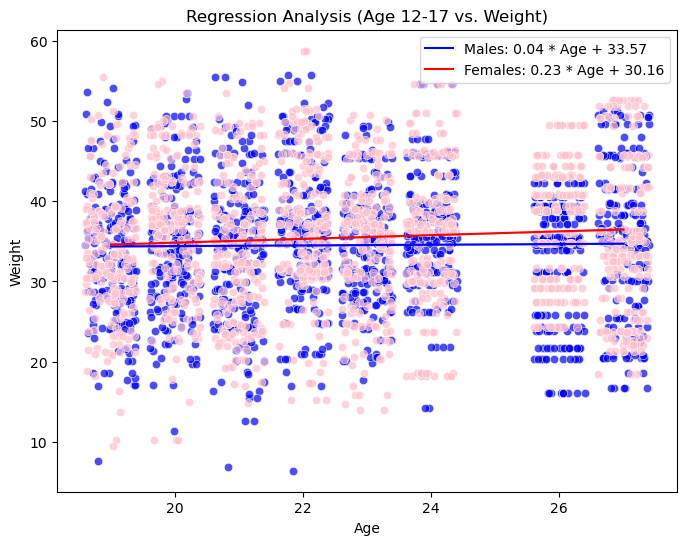

In [239]:
df_age_gt_18 = df_age_gt_18[(df_age_gt_18['Age'] != 25)]

males = df_age_gt_18[df_age_gt_18['Sex'] == 'M'].copy()
females = df_age_gt_18[df_age_gt_18['Sex'] == 'F'].copy()

males['Age_jittered'] = males['Age'] + np.random.uniform(-0.4, 0.4, len(males))
females['Age_jittered'] = females['Age'] + np.random.uniform(-0.4, 0.4, len(females))

# Regression analysis for males
X_males = males[['Age']]
y_males = males['Weight']

X_males = sm.add_constant(X_males)

model_males = sm.OLS(y_males, X_males).fit()  

# Regression analysis for females
X_females = females[['Age']]
y_females = females['Weight']

X_females = sm.add_constant(X_females) 

model_females = sm.OLS(y_females, X_females).fit()

# Model summaries
print("Male Regression Summary:")
print(model_males.summary())

print("\nFemale Regression Summary:")
print(model_females.summary())

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=males, x='Age_jittered', y='Weight', color='blue', alpha=0.7)
sns.scatterplot(data=females, x='Age_jittered', y='Weight', color='pink', alpha=0.7)

# Regression lines and formulas for males and females
sns.lineplot(x=males['Age'], y=model_males.predict(X_males), color='blue', label=f'Males: {model_males.params[1]:.2f} * Age + {model_males.params[0]:.2f}')
sns.lineplot(x=females['Age'], y=model_females.predict(X_females), color='red', label=f'Females: {model_females.params[1]:.2f} * Age + {model_females.params[0]:.2f}')

plt.title('Regression Analysis (Age 12-17 vs. Weight)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()

plt.show()



* Age 25 females are quite a bit above the males.  I will re-try the old regresstion and omit them.

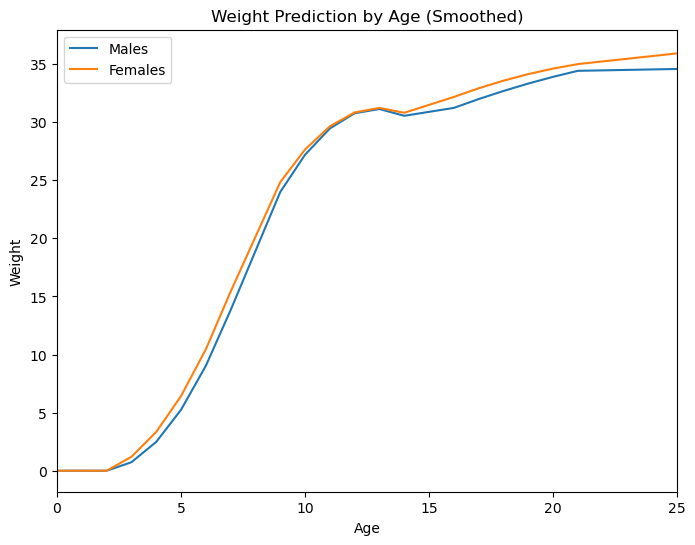

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Age range
age_range = np.arange(0, 29)  # Extended age range

# Weight calculation based on age range
weights_male = np.zeros_like(age_range, dtype=float)
weights_female = np.zeros_like(age_range, dtype=float)

for i, age in enumerate(age_range):
    if age < 5:
        weights_male[i] = 0
        weights_female[i] = 0
    elif age >= 5 and age <= 11:
        weights_male[i] = 5.08 * age - 21.74
        weights_female[i] = 4.71 * age - 17.56
    elif age >= 12 and age <= 18:
        weights_male[i] = 0.34 * age + 25.78
        weights_female[i] = 0.68 * age + 21.28
    else:
        weights_male[i] = 0.04 * age + 33.57
        weights_female[i] = 0.23 * age + 30.16

# Apply moving average for smoothing
window_size = 5  # Larger window size for smoother curve
weights_male_smoothed = np.convolve(weights_male, np.ones(window_size)/window_size, mode='same')
weights_female_smoothed = np.convolve(weights_female, np.ones(window_size)/window_size, mode='same')

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(age_range, weights_male_smoothed, label='Males')
plt.plot(age_range, weights_female_smoothed, label='Females')

plt.xlim(0, 25) 
plt.title('Weight Prediction by Age (Smoothed)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()



In [240]:
from scipy import stats

# Extract the 'Weight' data for each dataset
weight_gt_18 = df_age_gt_18['Weight']
weight_12_18 = df_age_12_18['Weight']
weight_5_11 = df_age_5_11['Weight']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(weight_gt_18, weight_12_18, weight_5_11)

# Print the results
print("ANOVA Results:")
print("F-value:", fvalue)
print("p-value:", pvalue)


ANOVA Results:
F-value: 1995.66272808573
p-value: 0.0


In [241]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine the weight data from all three groups
weight_data = np.concatenate([weight_gt_18, weight_12_18, weight_5_11])

# Create a corresponding group labels array
group_labels = ['18+', '12-18', '5-11']
group_labels = np.repeat(group_labels, [len(weight_gt_18), len(weight_12_18), len(weight_5_11)])

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(weight_data, group_labels)

# Print the results
print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 12-18    18+    3.812   0.0   3.2223   4.4017   True
 12-18   5-11 -11.6136   0.0 -12.2226 -11.0045   True
   18+   5-11 -15.4256   0.0 -16.0153 -14.8359   True
-----------------------------------------------------


# Conclusion

## Data Prep
* Remove Empty and Null Values
* Remove Outliers
* Normalize distribution by age in order to compare male and female crab sizes.

## Testing for male and female population differences
* In each of the size variables, is there a differece at any age of of crab between males and females?
* Significant difference can be spotted in the growth stages of a crab but it even out after age 11 and is undetectable after age 18.

## Life stage exploration
* Regression lines for slope at age 0-11, 12-18, 18+
* Life stages appear produce far more significant size differences than sex.
* Test the three life stages

## Final Thougths
* Life stages appear produce far more significant size differences than sex.
* We are able to approximate 4 separate life stages for these crabs
1. Baby crabs: 0-4 years.  Baby crabs appeared to be difficult to sample as is evident by few observations present.
2. Young crabs: 5-11 years.  A period of rapid growth
3. Mature crabs: 12-18 years. Growth rate slows down
4. Old crabs: 19+ years.  Crabs can only grow so big.